Face Recognition Using Convolutional Neural Networks

In [1]:
# import libraries 
import tensorflow
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
train_images = r"C:\Users\ADmin\Downloads\Face Images\Face Images\Final Training Images"

## Image Preprocessing using keras


# As we know deep-learning is hungry for data, the data we have is only limited. 
# so lets perform **Image Agumentation** to create different versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
# No transformations are made on the test data
test_gen = ImageDataGenerator()

# Generating training data
training_data = train_gen.flow_from_directory(
    train_images, 
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

# generating test data
testing_data = test_gen.flow_from_directory(
    train_images, 
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

# Printing class labels for each face
testing_data.class_indices

Found 254 images belonging to 17 classes.
Found 254 images belonging to 17 classes.


{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face17': 8,
 'face2': 9,
 'face3': 10,
 'face4': 11,
 'face5': 12,
 'face6': 13,
 'face7': 14,
 'face8': 15,
 'face9': 16}

In [3]:
# training_data have numeric tag for each face
Train_class = training_data.class_indices

# lets store them in a dictionary with swap for future reference
Result_class = {}
for value_tag, face_tag in zip(Train_class.values(),Train_class.keys()):
    Result_class[value_tag] = face_tag

    
# use pickle to save the mapping's
import pickle
with open(r'C:\Users\ADmin\Downloads\Face Images\Face Images\ResultMap.pkl','wb') as Final_mapping:
    pickle.dump(Result_class,Final_mapping)

In [4]:
print("Mapping of Face and its numeric value",Result_class)

Mapping of Face and its numeric value {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face17', 9: 'face2', 10: 'face3', 11: 'face4', 12: 'face5', 13: 'face6', 14: 'face7', 15: 'face8', 16: 'face9'}


In [5]:
Output_Neurons=len(Result_class)
print('\n The Number of output neurons: ', Output_Neurons)


 The Number of output neurons:  17


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [7]:
'''Initializing the Convolutional Neural Network'''
Model = Sequential()


Model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), input_shape = (100,100,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Flatten())
Model.add(Dense(64,activation='relu'))
Model.add(Dense(Output_Neurons,activation='softmax'))


Model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['Accuracy'])



from keras.callbacks import EarlyStopping
call = EarlyStopping(
                    min_delta=0.005,
                    patience=5,
                     verbose=1
                    )

import time
# Measuring the time taken by the model to train
StartTime=time.time()

'''# Model Training'''
Model.fit(training_data,
          epochs = 30,
          validation_data=testing_data,
                   callbacks=call)

Endtime = time.time()
print('Total Training Time taken: ',round((Endtime-StartTime)/60),'Minutes')

c:\Users\ADmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/30


c:\Users\ADmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - Accuracy: 0.0298 - loss: 325.8741 - val_Accuracy: 0.1220 - val_loss: 23.9193
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - Accuracy: 0.1318 - loss: 16.0385 - val_Accuracy: 0.2008 - val_loss: 3.1080
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - Accuracy: 0.2761 - loss: 2.5832 - val_Accuracy: 0.5354 - val_loss: 1.8890
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - Accuracy: 0.5321 - loss: 1.7838 - val_Accuracy: 0.6654 - val_loss: 1.3311
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - Accuracy: 0.7388 - loss: 0.9783 - val_Accuracy: 0.9134 - val_loss: 0.2762
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - Accuracy: 0.8460 - loss: 0.5661 - val_Accuracy: 0.9567 - val_loss: 0.1384
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - Accuracy: 0.9506 - loss: 0.2209 - val_Accuracy: 0.9921 - val_loss: 0.0457
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - Accuracy: 0.9493 - loss: 0.1398 - val_Accuracy: 0.9921 - val_loss: 0.0171

In [8]:
import numpy as np
from keras.preprocessing import image
import os
import glob

In [9]:

ImagePath=r"C:\Users\ADmin\Downloads\Face Images\Face Images\Final Training Images\face3\image_0427_Face_2.jpg"
test_image=image.load_img(ImagePath,target_size=(100, 100))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result=Model.predict(test_image,verbose=0)
#print(training_set.class_indices)
 
print('####'*10)
print('Prediction is: ',Result_class[np.argmax(result)])

########################################
Prediction is:  face3


In [10]:
'''############ Making multiple predictions ###########'''

## Loading all the image paths from final testing folder for prediction
main_ = r"C:\Users\ADmin\Downloads\Face Images\Face Images\Final Testing Images"
img_paths = glob.glob(os.path.join(main_,'**','*.jpg'))

print(img_paths[0:5]) # every image will be a PIL object
print('*'*50)

for path in img_paths:
    test_image = image.load_img(path,target_size=(100,100))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis =0)
    result = Model.predict(test_image,verbose=0)
    print('Prediction: ',Result_class[np.argmax(result)])

['C:\\Users\\ADmin\\Downloads\\Face Images\\Face Images\\Final Testing Images\\face1\\1face1.jpg', 'C:\\Users\\ADmin\\Downloads\\Face Images\\Face Images\\Final Testing Images\\face1\\2face1.jpg', 'C:\\Users\\ADmin\\Downloads\\Face Images\\Face Images\\Final Testing Images\\face1\\3face1.jpg', 'C:\\Users\\ADmin\\Downloads\\Face Images\\Face Images\\Final Testing Images\\face1\\4face1.jpg', 'C:\\Users\\ADmin\\Downloads\\Face Images\\Face Images\\Final Testing Images\\face10\\1face10.jpg']
**************************************************
Prediction:  face1
Prediction:  face1
Prediction:  face13
Prediction:  face1
Prediction:  face10
Prediction:  face10
Prediction:  face10
Prediction:  face10
Prediction:  face11
Prediction:  face11
Prediction:  face11
Prediction:  face11
Prediction:  face12
Prediction:  face12
Prediction:  face12
Prediction:  face12
Prediction:  face13
Prediction:  face13
Prediction:  face13
Prediction:  face13
Prediction:  face16
Prediction:  face14
Prediction:  face14

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [12]:

# Code to get evaluation metrics
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Function to load and preprocess images
def load_images(img_paths):
    images = []
    labels = []
    for path in img_paths:
        img = image.load_img(path, target_size=(100, 100))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        images.append(img)
        label = os.path.basename(os.path.dirname(path))  # Assuming folder name is the label
        labels.append(label)
    return np.vstack(images), labels

# Load test images
main_ = r"C:\Users\ADmin\Downloads\Face Images\Face Images\Final Testing Images"
img_paths = glob.glob(os.path.join(main_, '**', '*.jpg'))
test_images, true_labels = load_images(img_paths)

# Encode labels (assuming you have a list of class names)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Make predictions
predictions = Model.predict(test_images, verbose=0)
predicted_labels = np.argmax(predictions, axis=1)

# Decode predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predicted_labels)

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels_encoded, predicted_labels)
precision = precision_score(true_labels_encoded, predicted_labels, average='weighted')
recall = recall_score(true_labels_encoded, predicted_labels, average='weighted')
f1 = f1_score(true_labels_encoded, predicted_labels, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print classification report
print('\nClassification Report:')
print(classification_report(true_labels_encoded, predicted_labels, target_names=label_encoder.classes_))

# Print confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(true_labels_encoded, predicted_labels))

Accuracy: 0.9595
Precision: 0.9676
Recall: 0.9595
F1 Score: 0.9588

Classification Report:
              precision    recall  f1-score   support

       face1       1.00      0.75      0.86         4
      face10       1.00      1.00      1.00         4
      face11       1.00      1.00      1.00         4
      face12       1.00      1.00      1.00         4
      face13       0.80      1.00      0.89         4
      face14       1.00      0.75      0.86         4
      face15       1.00      1.00      1.00         4
      face16       0.80      1.00      0.89         4
      face17       1.00      1.00      1.00        10
       face2       1.00      1.00      1.00         4
       face3       1.00      1.00      1.00         4
       face4       0.80      1.00      0.89         4
       face5       1.00      1.00      1.00         4
       face6       1.00      1.00      1.00         4
       face7       1.00      1.00      1.00         4
       face8       1.00      0.75      0.86 

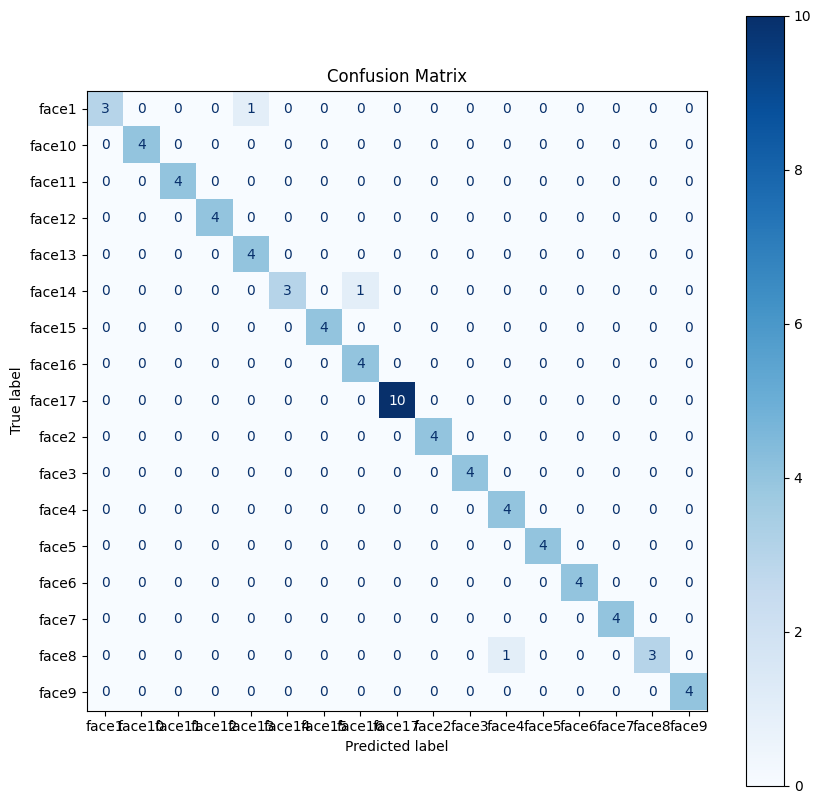

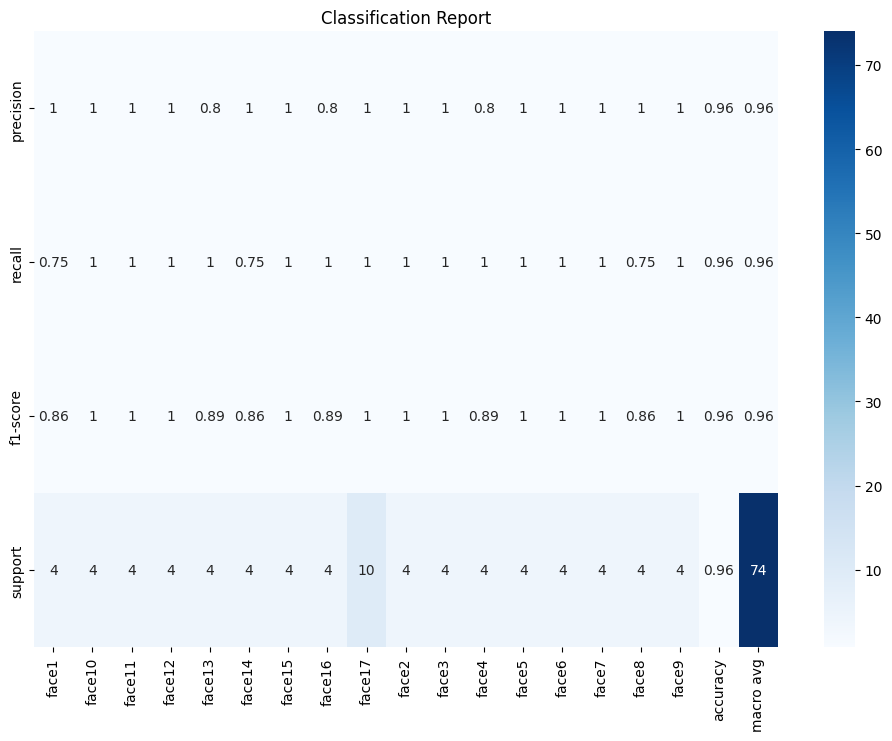

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(true_labels_encoded, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(true_labels_encoded, predicted_labels, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()


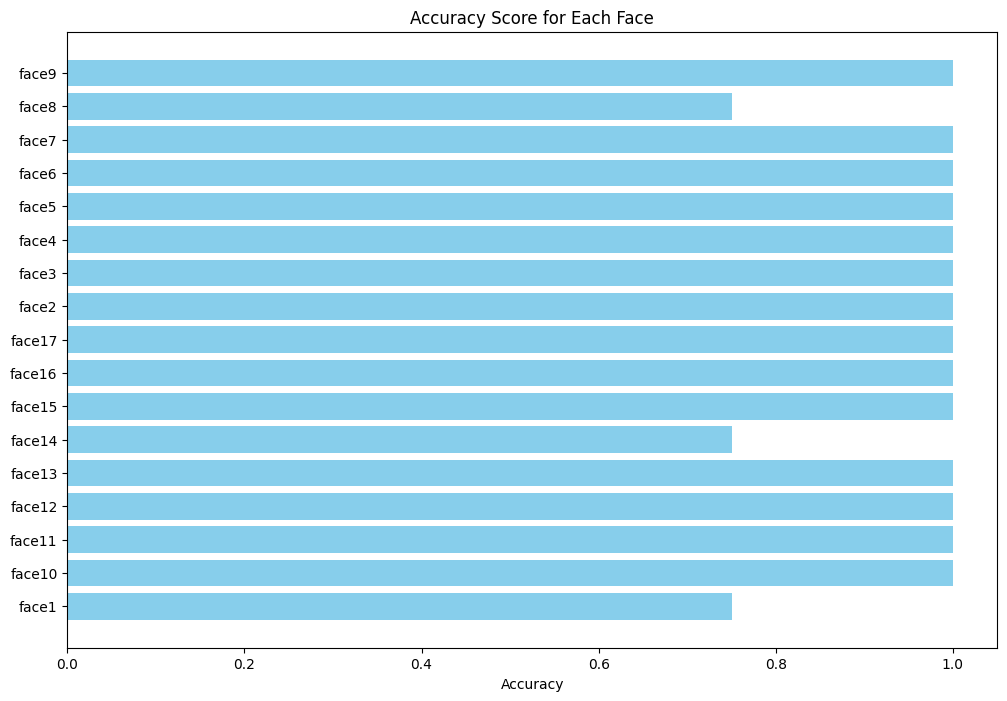

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate accuracy for each class
class_accuracies = []
for i, class_name in enumerate(label_encoder.classes_):
    class_indices = np.where(true_labels_encoded == i)
    class_true_labels = true_labels_encoded[class_indices]
    class_predicted_labels = predicted_labels[class_indices]
    class_accuracy = accuracy_score(class_true_labels, class_predicted_labels)
    class_accuracies.append(class_accuracy)

# Plotting the accuracy for each class
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(label_encoder.classes_, class_accuracies, color='skyblue')
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy Score for Each Face')
plt.show()


In [15]:
import cv2
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
import pickle
import threading
import tkinter as tk
from tkinter import Button
from PIL import Image, ImageTk


with open(r'C:\Users\ADmin\Downloads\Face Images\Face Images\ResultMap.pkl', 'rb') as file:
    Result_class = pickle.load(file)

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Create a Tkinter window
root = tk.Tk()
root.title("Face Recognition")

# Create a label to display the video feed
video_label = tk.Label(root)
video_label.pack()

# Variable to hold the PhotoImage object
img_tk = None

def update_frame():
    global img_tk
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Use OpenCV's Haar Cascade to detect faces in the frame
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(rgb_frame, scaleFactor=1.1, minNeighbors=5)

        for (x, y, w, h) in faces:
            # Extract the face region of interest (ROI)
            face_roi = rgb_frame[y:y+h, x:x+w]

            # Resize the face ROI to match the model's input size
            resized_face = cv2.resize(face_roi, (100, 100))
            test_image = image.img_to_array(resized_face)
            test_image = np.expand_dims(test_image, axis=0)

            # Make prediction
            result = Model.predict(test_image, verbose=0)
            prediction = Result_class[np.argmax(result)]

            # Check if the prediction matches a specific condition (e.g., a specific class)
            if prediction == 'face3':  # Change 'face3' to the class you are interested in
                color = (0, 255, 0)  # Green
                label = 'Detected'
            else:
                color = (0, 0, 255)  # Red
                label = 'Not detected'

            # Draw bounding box with the appropriate color
            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
            cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        # Convert the frame to an image format Tkinter can display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame_rgb)
        img_tk = ImageTk.PhotoImage(image=img)

        # Update the image in the Tkinter window
        video_label.config(image=img_tk)

        # Check if the window is closed
        if stop_event.is_set():
            break

def stop_video():
    stop_event.set()
    root.quit()

# Create a stop button
stop_button = Button(root, text="Stop", command=stop_video)
stop_button.pack()

# Create a threading event to signal when to stop the video feed
stop_event = threading.Event()

# Start the video feed in a separate thread
video_thread = threading.Thread(target=update_frame)
video_thread.start()

# Start the Tkinter event loop
root.mainloop()

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


In [16]:
# import cv2
# import os

# # Define the folder to save images
# save_folder = r"C:\Users\ADmin\Downloads\Face Images\Face Images\Final Training Images\face17"
# if not os.path.exists(save_folder):
#     os.makedirs(save_folder)

# # Initialize the webcam
# cap = cv2.VideoCapture(0)

# # Find the next available filename
# def get_next_filename(folder_path, base_filename):
#     i = 1
#     while True:
#         filename = os.path.join(folder_path, f"{base_filename}_{i}.jpg")
#         if not os.path.exists(filename):
#             return filename
#         i += 1

# print("Press 's' to capture an image and save it.")
# print("Press 'q' to quit without saving.")

# while True:
#     # Capture frame-by-frame
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Display the frame
#     cv2.imshow('Webcam', frame)

#     # Wait for user input
#     key = cv2.waitKey(1) & 0xFF

#     # If 's' is pressed, save the image
#     if key == ord('s'):
#         # Get a unique filename
#         filename = get_next_filename(save_folder, "captured_image")
#         cv2.imwrite(filename, frame)
#         print(f"Image saved as {filename}")

#     # If 'q' is pressed, exit the loop
#     elif key == ord('q'):
#         break

# # Release the webcam and close windows
# cap.release()
# cv2.destroyAllWindows()


In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model_2 = Sequential()

# VGG16 Architecture
model_2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3), padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(4096, activation='relu'))
model_2.add(Dense(4096, activation='relu'))
model_2.add(Dense(Output_Neurons, activation='softmax'))

# Compile the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


c:\Users\ADmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model_2.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['Accuracy'])



from keras.callbacks import EarlyStopping
call = EarlyStopping(
                    min_delta=0.005,
                    patience=5,
                     verbose=1
                    )

import time
# Measuring the time taken by the model to train
StartTime=time.time()

'''# Model Training'''
Model.fit(training_data,
          epochs = 30,
          validation_data=testing_data,
                   callbacks=call)

Endtime = time.time()
print('Total Training Time taken: ',round((Endtime-StartTime)/60),'Minutes')

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - Accuracy: 0.9890 - loss: 0.0383 - val_Accuracy: 0.9961 - val_loss: 0.0060
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - Accuracy: 0.9940 - loss: 0.0197 - val_Accuracy: 0.9921 - val_loss: 0.0191
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - Accuracy: 0.9920 - loss: 0.0126 - val_Accuracy: 1.0000 - val_loss: 0.0046
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - Accuracy: 1.0000 - loss: 0.0104 - val_Accuracy: 1.0000 - val_loss: 0.0025
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - Accuracy: 0.9888 - loss: 0.0772 - val_Accuracy: 1.0000 - val_loss: 0.0042
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - Accuracy: 0.9890 - loss: 0.0364 - val_Accuracy: 0.9882 - val_loss: 0.0337
Epoch 6: early stopping
Total Training Time taken:  0 Minutes


In [19]:

# Make predictions
predictions2 = model_2.predict(test_images, verbose=0)
predicted_labels2 = np.argmax(predictions2, axis=1)

# Decode predicted labels
predicted_labels_decoded2 = label_encoder.inverse_transform(predicted_labels2)

# Calculate evaluation metrics
accuracy2 = accuracy_score(true_labels_encoded, predicted_labels2)
precision2 = precision_score(true_labels_encoded, predicted_labels2, average='weighted')
recall2 = recall_score(true_labels_encoded, predicted_labels2, average='weighted')
f12 = f1_score(true_labels_encoded, predicted_labels2, average='weighted')

# Print evaluation metrics
print(f'Accuracy (Vgg16): {accuracy:.4f}')
print(f'Precision (Vgg16): {precision:.4f}')
print(f'Recall (Vgg16): {recall:.4f}')
print(f'F1 Score (Vgg16): {f1:.4f}')

# Print classification report
print('\nClassification Report (Vgg16):')
print(classification_report(true_labels_encoded, predicted_labels2, target_names=label_encoder.classes_))

# Print confusion matrix
print('\nConfusion Matrix (Vgg16):')
print(confusion_matrix(true_labels_encoded, predicted_labels2))

Accuracy (Vgg16): 0.9595
Precision (Vgg16): 0.9676
Recall (Vgg16): 0.9595
F1 Score (Vgg16): 0.9588

Classification Report (Vgg16):
              precision    recall  f1-score   support

       face1       0.00      0.00      0.00         4
      face10       0.00      0.00      0.00         4
      face11       0.00      0.00      0.00         4
      face12       0.00      0.00      0.00         4
      face13       0.00      0.00      0.00         4
      face14       0.00      0.00      0.00         4
      face15       0.00      0.00      0.00         4
      face16       0.00      0.00      0.00         4
      face17       0.00      0.00      0.00        10
       face2       0.00      0.00      0.00         4
       face3       0.00      0.00      0.00         4
       face4       0.00      0.00      0.00         4
       face5       0.05      1.00      0.10         4
       face6       0.00      0.00      0.00         4
       face7       0.00      0.00      0.00         4
    

c:\Users\ADmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [21]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
import glob
import os

# Function to load and preprocess images
def load_images(img_paths, target_size=(100, 100)):
    images = []
    labels = []
    for path in img_paths:
        img = image.load_img(path, target_size=target_size)
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        images.append(img)
        label = os.path.basename(os.path.dirname(path))  # Assuming folder name is the label
        labels.append(label)
    return np.vstack(images), labels

# Load test images
main_ = r"C:\Users\ADmin\Downloads\Face Images\Face Images\Final Testing Images"
img_paths = glob.glob(os.path.join(main_, '**', '*.jpg'))
test_images, true_labels = load_images(img_paths)

# Encode labels
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Make predictions
predictions2 = model_2.predict(test_images, verbose=0)
predicted_labels2 = np.argmax(predictions2, axis=1)

# Calculate evaluation metrics
accuracy2 = accuracy_score(true_labels_encoded, predicted_labels2)
precision2 = precision_score(true_labels_encoded, predicted_labels2, average='weighted')
recall2 = recall_score(true_labels_encoded, predicted_labels2, average='weighted')
f12 = f1_score(true_labels_encoded, predicted_labels2, average='weighted')

# Print evaluation metrics
print(f'Accuracy (VGG16): {accuracy2:.4f}')
print(f'Precision (VGG16): {precision2:.4f}')
print(f'Recall (VGG16): {recall2:.4f}')
print(f'F1 Score (VGG16): {f12:.4f}')

# Print classification report
print('\nClassification Report (VGG16):')
print(classification_report(true_labels_encoded, predicted_labels2, target_names=label_encoder.classes_))

# Print confusion matrix
print('\nConfusion Matrix (VGG16):')
print(confusion_matrix(true_labels_encoded, predicted_labels2))


Accuracy (VGG16): 0.0541
Precision (VGG16): 0.0029
Recall (VGG16): 0.0541
F1 Score (VGG16): 0.0055

Classification Report (VGG16):
              precision    recall  f1-score   support

       face1       0.00      0.00      0.00         4
      face10       0.00      0.00      0.00         4
      face11       0.00      0.00      0.00         4
      face12       0.00      0.00      0.00         4
      face13       0.00      0.00      0.00         4
      face14       0.00      0.00      0.00         4
      face15       0.00      0.00      0.00         4
      face16       0.00      0.00      0.00         4
      face17       0.00      0.00      0.00        10
       face2       0.00      0.00      0.00         4
       face3       0.00      0.00      0.00         4
       face4       0.00      0.00      0.00         4
       face5       0.05      1.00      0.10         4
       face6       0.00      0.00      0.00         4
       face7       0.00      0.00      0.00         4
    

c:\Users\ADmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo